### Import Qiskit

In [3]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram

## Problem 1: A first quantum circuit in Qiskit

Initialise a simple circuit with 1 qubit and 1 classical bit for the output

In [45]:
# Every quantum circuit is initialised with every qubit in |0>
qc1a = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))
qc1a = QuantumCircuit(1,1)

In [46]:
# In Qiskit, standard gates are methods of the circuit object
# TODO apply a single qubit gate to qubit 0
qc1a.x(0)
qc1a.measure(qubit=0, cbit=0)

we can also draw the circuit

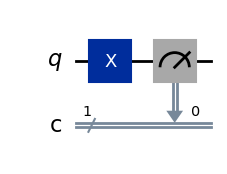

In [47]:
qc1a.draw('mpl')

Finially we run the circuit on a simulator (1000 times)
and plot the measurement results

In [48]:
simulator = QasmSimulator()
results1a = simulator.run(qc1a, shots=1000).result()

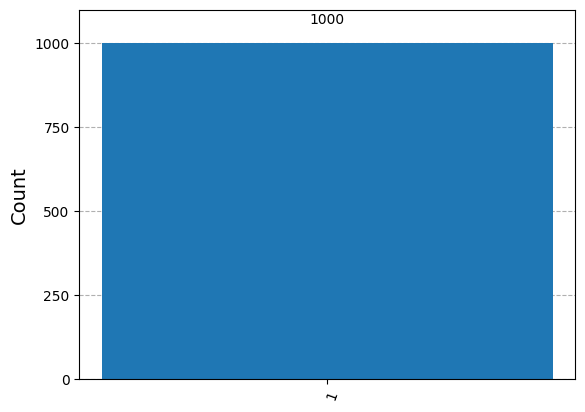

In [49]:
plot_histogram(results1a.get_counts())

#### Preparing Bell states

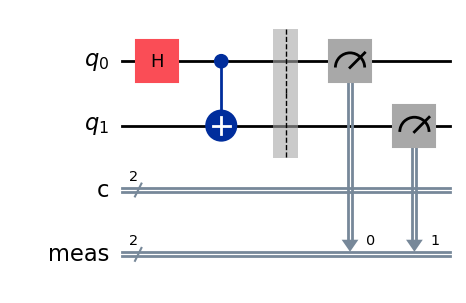

In [50]:
# Shortcut for QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
qc1b = QuantumCircuit(2,2)

# TODO prepare a Bell state
# e.g. by doing a h gate on qubit 0 followed by a cnot on qubits 0 and 1
qc1b.h(0)
qc1b.cx(0,1)

# Shortcut:
qc1b.measure_all()

qc1b.draw('mpl')

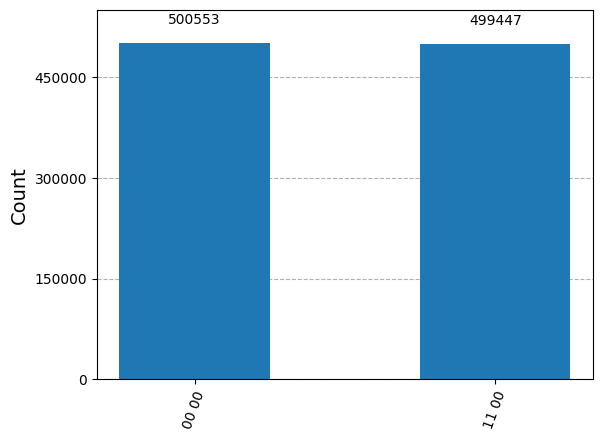

In [51]:
results1b = simulator.run(qc1b, shots=1000000).result()
plot_histogram(results1b.get_counts())

## Problem 2: Use different simulators in Qiskit

We are going to see how the use of different simulators affects the final result

In [52]:
from qiskit_aer import QasmSimulator, StatevectorSimulator
from qiskit_aer.noise import NoiseModel

To use the Noise Model from real quantum devices (or run circuits on real hardware)
you can create an account on https://quantum-computing.ibm.com

On the Welcome page you can find the API Token.

In [53]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your credentials on disk.
QiskitRuntimeService.save_account(channel='ibm_quantum', token="b34d7fac602392eb0d4e84507544cb4d7e3c8e022251e6155f0cfe928f18667828496a75b50a7555a0c1af25430fa5096f9f45365349a83678e77bbcbf577379")

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
)

AccountAlreadyExistsError: 'Named account (default-ibm-quantum) already exists. Set overwrite=True to overwrite.'

Get the noise model for a real quantum device

First print the available ones

In [28]:
service.backends(simulator=False)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

Choose one and get a noise model (approximately) describing it

In [29]:
backend = service.backend('ibm_brisbane')
noise_model = NoiseModel.from_backend(backend)
print(noise_model)

NoiseModel:
  Basis gates: ['delay', 'ecr', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']
  Instructions with noise: ['sx', 'id', 'measure', 'x', 'reset', 'ecr']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
  Specific qubit errors: [('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), 

prepare the simulators

In [30]:
statevector_simulator = StatevectorSimulator()
qasm_simulator        = QasmSimulator()
noisy_qasm_simulator  = QasmSimulator(noise_model=noise_model)

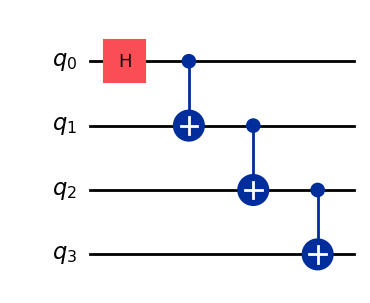

In [58]:
qc2 = QuantumCircuit(4)

# TODO implement a circuit that prepares 1/√2 (|0000⟩ + |1111⟩)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.cx(2,3)

qc2.draw('mpl')

If we use the statevector_simulator we can directly extract the coefficients in the computational basis:

In [59]:
# Statevector simulator is the exact state at the end of the circuit, then shots=1 by default
results2 = statevector_simulator.run(qc2).result()
results2.get_statevector()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2, 2, 2))


As we can see, we obtain the vector describing the state of the quantum computer.

Now we add the missing measurements of the end of the circuit

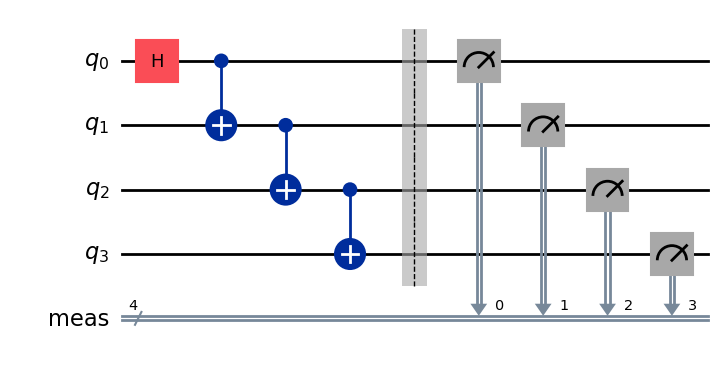

In [61]:
qc2.measure_all()
qc2.draw('mpl')

In [62]:
results2 = qasm_simulator.run(qc2, shots=1000).result()

plot the result of 1000 runs

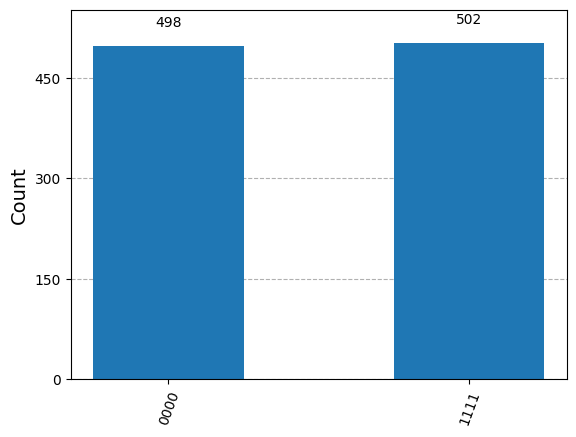

In [63]:
plot_histogram(results2.get_counts())

and finally we run it using the simulated noise model from the device we selected

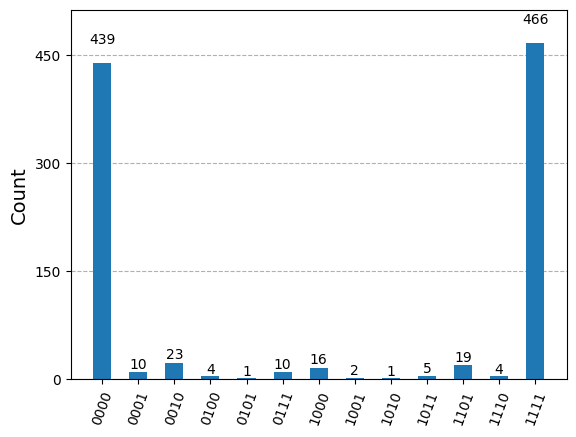

In [64]:
results2 = noisy_qasm_simulator.run(qc2, shots=1000).result()
plot_histogram(results2.get_counts())

## Problem 3: Transpile a quantum Circuit

In [65]:
from qiskit.compiler import transpile

First we select a backend to transpile for

In [66]:
from qiskit.providers.fake_provider import GenericBackendV2
fake_hardware_backend = GenericBackendV2(num_qubits=5)

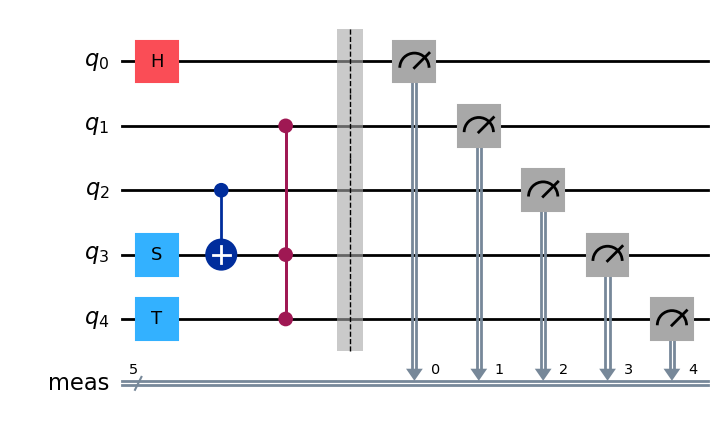

In [67]:
qc3 = QuantumCircuit(5)

# TODO implement a circuit of your choice using 5 qubits
qc3.h(0)
qc3.s(3)
qc3.t(4)
qc3.cx(2,3)
qc3.ccz(3,4,1)

qc3.measure_all()
qc3.draw('mpl')

then we transpile the circuit for the selected backend

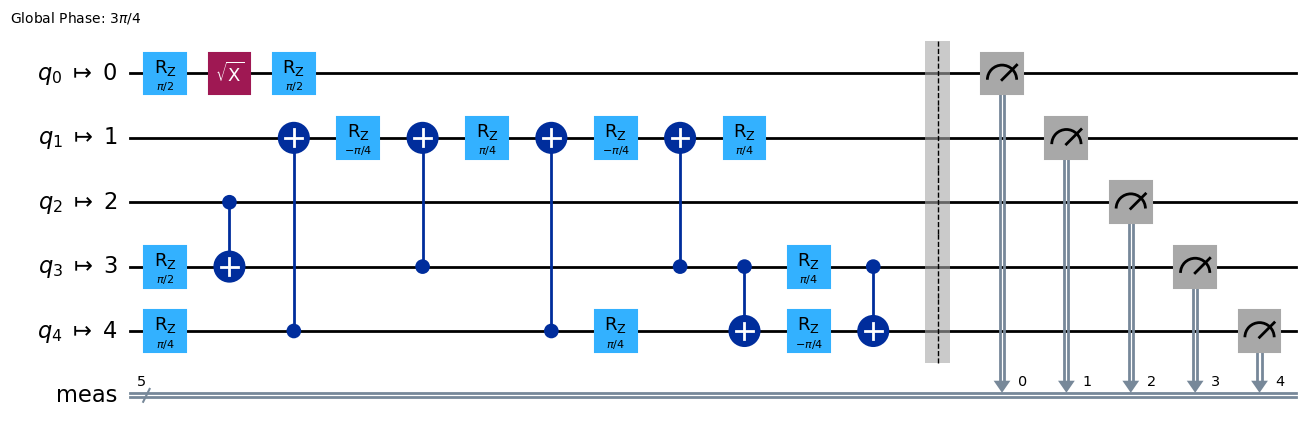

In [68]:
transpiled_qc3 = transpile(qc3, backend = fake_hardware_backend)
transpiled_qc3.draw('mpl')

As you can see, transpilation greatly extend the depth of your circuit. You can use the options in the transpile function to reduce the depth of the transpiled circuit.

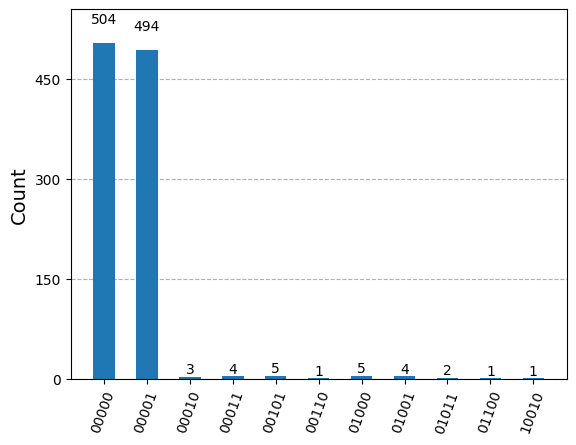

In [69]:
results = fake_hardware_backend.run(transpiled_qc3, shots=1024).result()
plot_histogram(results.get_counts(transpiled_qc3))

## Problem 4:  Quantum Fourier Transform

In [76]:
from qiskit.circuit.library import SGate, TGate
CS = SGate().control()
CT = TGate().control()

In [97]:
def qft(qc):
    # TODO implement the QFT for 3 qubits
    qc.append(CS, [0, 1])
    qc.append(CT, [1, 2])
    pass


def initialize(qc):
    # TODO initialize to states different from |000⟩ here
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)
    pass

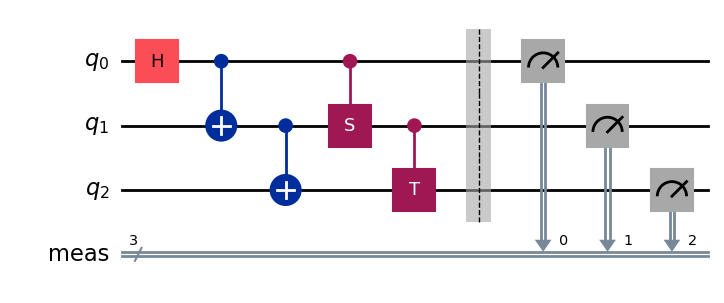

In [98]:
qc4 = QuantumCircuit(3)

initialize(qc4)
qft(qc4)
qc4.measure_all()

qc4.draw(output='mpl')

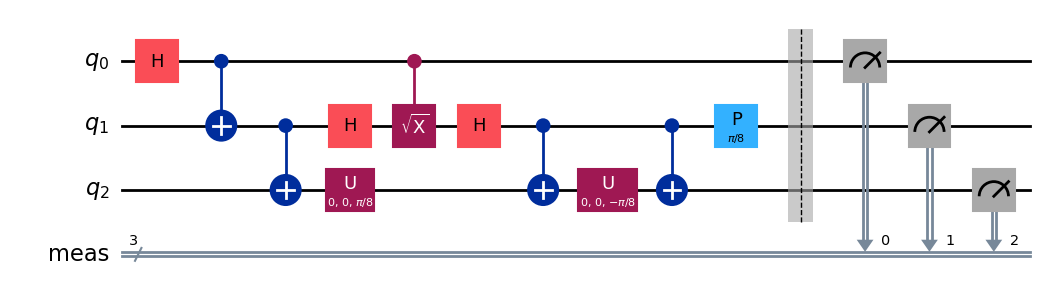

In [87]:
qc4_transpiled = transpile(qc4, simulator)
qc4_transpiled.draw(output='mpl')

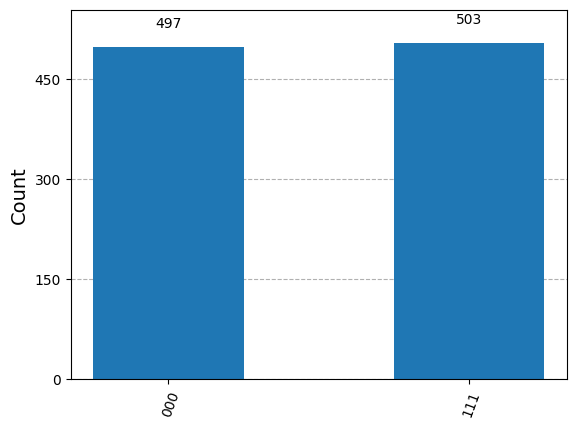

In [88]:
results4 = simulator.run(qc4_transpiled, shots=1000).result()
plot_histogram(results4.get_counts())

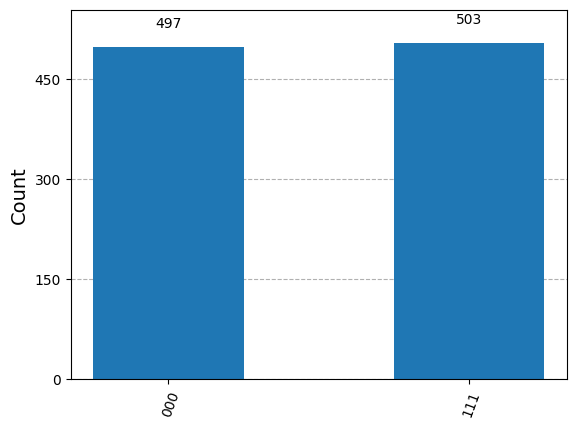

In [89]:
# TODO also run the qft cirquit with a noise model like in Problem 3 and plot the results
fake_hardware_backend = GenericBackendV2(num_qubits=3)

transpiled_qc4 = transpile(qc4, backend = fake_hardware_backend)
transpiled_qc4.draw('mpl')

results = fake_hardware_backend.run(transpiled_qc4, shots=1024).result()
plot_histogram(results4.get_counts())
